In [3]:
import numpy as np
import pandas as pd
import sqlite3
from scipy.signal import savgol_filter as sg

In [139]:
states = np.unique(pd.read_pickle(f'/home/amckann/PycharmProjects/nclimdiv/st_tavg')['fips'])
states = [x for x in states if int(x) < 51] # exclude regions!

In [131]:
# 10 year normals
f_list = [
    'cdd',
    'hdd',
    'pcp',
    'pdsi',
    'phdi',
    'pmdi',
    'tavg',
    'tmax',
    'tmin',
    'zndx'
]

DB = '/home/amckann/DataGripProjects/nclimdiv/clim.sqlite'
conn = sqlite3.connect(DB)
cur = conn.cursor()
for var in f_list:
    df = pd.read_pickle(f'/home/amckann/PycharmProjects/nclimdiv/st_{var}')
    try:
        sql = f"ALTER TABLE STATE_RECORDS ADD {var}_normal_10"
        cur.execute(sql)
        sql = f"ALTER TABLE STATE_RECORDS ADD {var}_normal_deriv_10"
        cur.execute(sql)
        sql = f"ALTER TABLE STATE_RECORDS ADD {var}_normal_deriv2_10"
        cur.execute(sql)
        conn.commit()
    except Exception as e:
        print(e)
    for state in states:
        for month in range(1, 13):
            m = str(month).zfill(2)
            # purposefully redefining these vars to save memory
            try:
                transformed = sg(df[df['fips'] == state][month], window_length=31, polyorder=3, deriv=0)
                rolling = list(pd.DataFrame(transformed).rolling(10).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE STATE_RECORDS SET {var}_normal_10 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND mo = '{m}'"
                        cur.execute(sql)
                transformed = sg(df[df['fips'] == state][month], window_length=31, polyorder=3, deriv=1)
                rolling = list(pd.DataFrame(transformed).rolling(10).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE STATE_RECORDS SET {var}_normal_deriv_10 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND mo = '{m}'"
                        cur.execute(sql)
                transformed = sg(df[df['fips'] == state][month], window_length=31, polyorder=3, deriv=2)
                rolling = list(pd.DataFrame(transformed).rolling(10).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE STATE_RECORDS SET {var}_normal_deriv2_10 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND mo = '{m}'"
                        cur.execute(sql)
            except Exception as e:
                print(e)
                print(state)
conn.commit()
conn.close()



duplicate column name: cdd_normal_10
If mode is 'interp', window_length must be less than or equal to the size of x.
111
If mode is 'interp', window_length must be less than or equal to the size of x.
111
If mode is 'interp', window_length must be less than or equal to the size of x.
111
If mode is 'interp', window_length must be less than or equal to the size of x.
111
If mode is 'interp', window_length must be less than or equal to the size of x.
111
If mode is 'interp', window_length must be less than or equal to the size of x.
111
If mode is 'interp', window_length must be less than or equal to the size of x.
111
If mode is 'interp', window_length must be less than or equal to the size of x.
111
If mode is 'interp', window_length must be less than or equal to the size of x.
111
If mode is 'interp', window_length must be less than or equal to the size of x.
111
If mode is 'interp', window_length must be less than or equal to the size of x.
111
If mode is 'interp', window_length must

In [140]:
# 30 year normals

f_list = [
    'cdd',
    'hdd',
    'pcp',
    'pdsi',
    'phdi',
    'pmdi',
    'tavg',
    'tmax',
    'tmin',
    'zndx'
]

DB = '/home/amckann/DataGripProjects/nclimdiv/clim.sqlite'
conn = sqlite3.connect(DB)
cur = conn.cursor()
for var in f_list:
    df = pd.read_pickle(f'/home/amckann/PycharmProjects/nclimdiv/st_{var}')
    try:
        sql = f"ALTER TABLE STATE_RECORDS ADD {var}_normal_30"
        cur.execute(sql)
        sql = f"ALTER TABLE STATE_RECORDS ADD {var}_normal_deriv_30"
        cur.execute(sql)
        sql = f"ALTER TABLE STATE_RECORDS ADD {var}_normal_deriv2_30"
        cur.execute(sql)
        conn.commit()
    except Exception as e:
        print(e)
    for state in states:
        for month in range(1, 13):
            m = str(month).zfill(2)
            # purposefully redefining these vars to save memory
            try:
                transformed = sg(df[df['fips'] == state][month], window_length=31, polyorder=3, deriv=0)
                rolling = list(pd.DataFrame(transformed).rolling(30).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE STATE_RECORDS SET {var}_normal_30 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND mo = '{m}'"
                        cur.execute(sql)
                transformed = sg(df[df['fips'] == state][month], window_length=31, polyorder=3, deriv=1)
                rolling = list(pd.DataFrame(transformed).rolling(30).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE STATE_RECORDS SET {var}_normal_deriv_30 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND mo = '{m}'"
                        cur.execute(sql)
                transformed = sg(df[df['fips'] == state][month], window_length=31, polyorder=3, deriv=2)
                rolling = list(pd.DataFrame(transformed).rolling(30).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE STATE_RECORDS SET {var}_normal_deriv2_30 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND mo = '{m}'"
                        cur.execute(sql)
            except Exception as e:
                print(e)
                print(state)
conn.commit()
conn.close()



Counties

In [146]:
df = pd.read_pickle('/home/amckann/PycharmProjects/nclimdiv/tavg')
codes = list(df['county fips'])
states = list(df['state fips'])
combined = []
for i, ele in enumerate(codes):
    combined.append(states[i].zfill(3) + ',' + ele)
combined = set(list(combined))

In [155]:
# 30 year normals

f_list = [
    'pcp',
    'tavg',
    'tmax',
    'tmin',
]

DB = '/home/amckann/DataGripProjects/nclimdiv/clim.sqlite'
conn = sqlite3.connect(DB)
cur = conn.cursor()
for var in f_list:
    df = pd.read_pickle(f'/home/amckann/PycharmProjects/nclimdiv/{var}')
    try:
        sql = f"ALTER TABLE COUNTY_RECORDS ADD {var}_normal_30"
        cur.execute(sql)
        sql = f"ALTER TABLE COUNTY_RECORDS ADD {var}_normal_deriv_30"
        cur.execute(sql)
        sql = f"ALTER TABLE COUNTY_RECORDS ADD {var}_normal_deriv2_30"
        cur.execute(sql)
        conn.commit()
    except Exception as e:
        print(e)
    for code in combined:
        state, county = code.split(',')
        sub = df[df['state fips'] == state[1:]]
        data = sub[sub['county fips'] == county]
        for month in range(1, 13):
            m = str(month).zfill(2)
            # purposefully redefining these vars to save memory
            try:
                transformed = sg(data[month], window_length=31, polyorder=3, deriv=0)
                rolling = list(pd.DataFrame(transformed).rolling(30).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE COUNTY_RECORDS SET {var}_normal_30 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND county = '{county}' AND mo = '{m}'"
                        cur.execute(sql)
                transformed = sg(data[month], window_length=31, polyorder=3, deriv=1)
                rolling = list(pd.DataFrame(transformed).rolling(30).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE COUNTY_RECORDS SET {var}_normal_deriv_30 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND county = '{county}' AND mo = '{m}'"
                        cur.execute(sql)
                transformed = sg(data[month], window_length=31, polyorder=3, deriv=2)
                rolling = list(pd.DataFrame(transformed).rolling(30).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE COUNTY_RECORDS SET {var}_normal_deriv2_30 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND county = '{county}' AND mo = '{m}'"
                        cur.execute(sql)
            except Exception as e:
                print(e)
                print(state)
conn.commit()
conn.close()



duplicate column name: pcp_normal_30
duplicate column name: tavg_normal_30
duplicate column name: tmax_normal_30


In [156]:
# 10 year normals

f_list = [
    'pcp',
    'tavg',
    'tmax',
    'tmin',
]

DB = '/home/amckann/DataGripProjects/nclimdiv/clim.sqlite'
conn = sqlite3.connect(DB)
cur = conn.cursor()
for var in f_list:
    df = pd.read_pickle(f'/home/amckann/PycharmProjects/nclimdiv/{var}')
    try:
        sql = f"ALTER TABLE COUNTY_RECORDS ADD {var}_normal_10"
        cur.execute(sql)
        sql = f"ALTER TABLE COUNTY_RECORDS ADD {var}_normal_deriv_10"
        cur.execute(sql)
        sql = f"ALTER TABLE COUNTY_RECORDS ADD {var}_normal_deriv2_10"
        cur.execute(sql)
        conn.commit()
    except Exception as e:
        print(e)
    for code in combined:
        state, county = code.split(',')
        sub = df[df['state fips'] == state[1:]]
        data = sub[sub['county fips'] == county]
        for month in range(1, 13):
            m = str(month).zfill(2)
            # purposefully redefining these vars to save memory
            try:
                transformed = sg(data[month], window_length=31, polyorder=3, deriv=0)
                rolling = list(pd.DataFrame(transformed).rolling(10).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE COUNTY_RECORDS SET {var}_normal_10 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND county = '{county}' AND mo = '{m}'"
                        cur.execute(sql)
                transformed = sg(data[month], window_length=31, polyorder=3, deriv=1)
                rolling = list(pd.DataFrame(transformed).rolling(10).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE COUNTY_RECORDS SET {var}_normal_deriv_10 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND county = '{county}' AND mo = '{m}'"
                        cur.execute(sql)
                transformed = sg(data[month], window_length=31, polyorder=3, deriv=2)
                rolling = list(pd.DataFrame(transformed).rolling(10).mean()[0])
                for year, record in enumerate(rolling):
                    if not np.isnan(record):
                        sql = f"UPDATE COUNTY_RECORDS SET {var}_normal_deriv2_10 = {record} WHERE yr = '{str(year + 1895)}' AND state = '{state}' AND county = '{county}' AND mo = '{m}'"
                        cur.execute(sql)
            except Exception as e:
                print(e)
                print(state)
conn.commit()
conn.close()



127
(127,)


<AxesSubplot:>

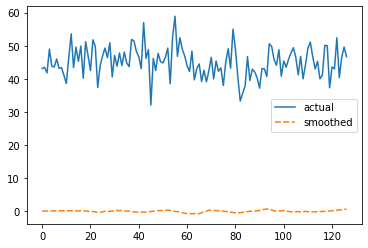

<AxesSubplot:>

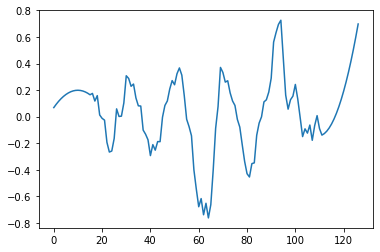

nan
nan
nan
nan
nan
nan
nan
nan
nan
0.1494878940553893
0.16253990371555802
0.17294696622708272
0.18070908158996332
0.1858262498041999
0.1882984708697924
0.1881257447867409
0.187784543233817
0.18079597998568414
0.1772364148915707
0.15873997574052334
0.13758925296278843
0.11525485090385575
0.07659463550310339
0.031321976636745595
-0.012248827177752206
-0.04513986004453428
-0.056767326887273005
-0.06838302585166008
-0.0838219159137017
-0.07474075968743321
-0.042683724389746484
-0.011344983235483108
0.030848023353339193
0.08204041701117655
0.12203545383164856
0.1466133790962028
0.1487333482538528
0.13847301492646785
0.12484822956384474
0.09707616429623701
0.036984099484671684
-0.012803949823432645
-0.06088033420972847
-0.10420838835584849
-0.13714440212833098
-0.1457503583898932
-0.14530212565357897
-0.12339064721348217
-0.08935196118087312
-0.04478696496800831
0.008524281286990893
0.06186880129238417
0.12377652853536962
0.17379663653812183
0.2086246738304987
0.20710780595987993
0.19116301

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '050']

,1,2,3,4,5,6,7,8,9,10,11,12,state fips,county fips,variable,year
0,44.0,38.2,55.5,64.1,70.6,78.3,80.4,80.4,79.0,61.4,54.4,45.3,01,001,02,1895
1,44.3,49.0,54.0,69.3,76.8,78.0,81.7,83.1,77.9,64.7,58.0,47.3,01,001,02,1896
2,43.7,52.3,61.3,63.0,70.0,82.4,82.4,79.6,76.6,67.4,54.9,48.2,01,001,02,1897
3,50.1,46.8,60.1,59.6,75.0,81.5,80.8,79.2,76.2,62.1,50.2,44.2,01,001,02,1898
4,44.6,41.5,56.6,62.3,76.7,81.0,81.0,81.5,74.3,66.6,55.7,45.3,01,001,02,1899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,53.1,56.3,59.3,68.2,70.4,76.4,81.3,79.5,75.2,66.7,55.5,47.3,01,001,02,2017
123,40.6,58.7,56.2,60.6,75.0,80.4,81.6,80.0,80.5,68.1,50.8,49.4,01,001,02,2018
124,47.0,58.7,56.4,64.6,75.5,79.4,81.7,82.2,82.0,69.5,51.8,52.1,01,001,02,2019
125,50.7,52.5,65.2,63.4,70.3,78.2,82.2,81.6,76.0,68.4,59.6,46.8,01,001,02,2020


,1,2,3,4,5,6,7,8,9,10,11,12,state fips,county fips,variable,year
